In [1]:
'''import packages'''
from extractvideo import *
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import skimage
from retinaface import RetinaFace
import matplotlib.image as mpimg
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import csv
import pandas as pd

In [12]:
# try:
#     delete_frames(r'C:\Users\oskar\OneDrive\Dokument\repo\kandidat\stroke-video-analysis\frames')
# except:
#    pass
#extract_frames(r'C:\Users\oskar\OneDrive\Dokument\repo\kandidat\stroke-video-analysis\frames',r'C:\Users\oskar\OneDrive\Dokument\repo\kandidat\stroke-video-analysis\video\108050fps-1.MP4')

faces = []
i = 0
path_to = r'C:\Users\oskar\Documents\repo\stroke-video-analysis\faces'


#extract faces from frames with retina face
for im in os.listdir(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\frames'): 
    i += 1
    face = RetinaFace.extract_faces(r'C:\Users\oskar\Documents\repo\stroke-video-analysis\frames\\'+ im , align=False)
    print('Processing... pic num'+str(i))
    if i > 200:
        break
    faces.append(face)
    
    
print(len(faces))
 

Processing... pic num1
Processing... pic num2
Processing... pic num3
Processing... pic num4
Processing... pic num5
Processing... pic num6
Processing... pic num7
Processing... pic num8
Processing... pic num9
Processing... pic num10
Processing... pic num11
Processing... pic num12
Processing... pic num13
Processing... pic num14
Processing... pic num15
Processing... pic num16
Processing... pic num17
Processing... pic num18
Processing... pic num19
Processing... pic num20
Processing... pic num21
Processing... pic num22
Processing... pic num23
Processing... pic num24
Processing... pic num25
Processing... pic num26
Processing... pic num27
Processing... pic num28
Processing... pic num29
Processing... pic num30
Processing... pic num31
Processing... pic num32
Processing... pic num33
Processing... pic num34
Processing... pic num35
Processing... pic num36
Processing... pic num37
Processing... pic num38
Processing... pic num39
Processing... pic num40
Processing... pic num41
Processing... pic num42
P

In [17]:
bfaces = faces.copy()
i = 0
bfaces.remove(bfaces[181])
for face in bfaces:
    i += 1
    try:
        im = skimage.color.rgb2gray(face)
    except:
        print(i)

181


In [14]:
#do pca (principal componant analysis) on the faces to lower processing time later
pca_face = []
cfaces = faces.copy()
i = 0
for face in cfaces: #go through faces 
    #reduce to one dimension

    print(i)
    print(face)

    im = skimage.color.rgb2gray(face)
    image = im[0,:,:]
    image = cv2.resize(image, (320,400))
    print(image.shape)
    pca = PCA(n_components=30) #select number of components (want to keep variance high)
    
    #transform face by compressing and decompressing
    image_compressed = pca.fit_transform(image)
    image_decompressed = pca.inverse_transform(image_compressed)
    pca_face.append(image_decompressed) #append to new list
    print(image_decompressed.shape)
#plot results
fig, axes = plt.subplots(1,2, figsize=(9, 9))
axes[0].imshow(skimage.color.rgb2gray(faces[0])[0,:,:], cmap='gray')
axes[0].set_label("Original image")
axes[1].imshow(pca_face[0], cmap='gray')
axes[1].set_label("Compressed image")



0
[array([[[ 87,  68,  53],
        [ 87,  68,  53],
        [ 88,  69,  54],
        ...,
        [160, 160, 152],
        [161, 161, 153],
        [162, 163, 157]],

       [[ 88,  69,  54],
        [ 89,  70,  55],
        [ 89,  70,  55],
        ...,
        [159, 159, 151],
        [159, 159, 151],
        [159, 160, 154]],

       [[ 87,  68,  53],
        [ 88,  69,  54],
        [ 89,  70,  55],
        ...,
        [158, 158, 150],
        [159, 159, 151],
        [158, 159, 151]],

       ...,

       [[124, 126, 104],
        [124, 126, 104],
        [123, 125, 103],
        ...,
        [181, 183, 178],
        [181, 183, 178],
        [182, 183, 178]],

       [[120, 122, 100],
        [120, 122, 100],
        [121, 123, 101],
        ...,
        [180, 182, 177],
        [180, 182, 177],
        [182, 183, 178]],

       [[119, 121,  99],
        [119, 121,  99],
        [121, 123, 101],
        ...,
        [180, 181, 176],
        [181, 182, 177],
        [182, 183, 17

ValueError: the input array must have size 3 along `channel_axis`, got (0,)

In [103]:
face_data = []
file = open("label1.csv","r")
target = [list(map(int,rec)) for rec in csv.reader(file, delimiter=',')]
file.close()
print(target[0][0:len(pca_face)])
for faces in pca_face:
    f = faces.ravel()
    face_data.append(f)
df = {'faces': pca_face,
      'target':target[0][:len(pca_face)],
      'data': face_data 
      

    
}
df = pd.DataFrame(df) 
print(len(pca_face))
print(len(face_data[0]))
print(len(df.faces))
print(len(df.target))
print(df.faces[0].shape[0])

[0]
1
128000
1
1
400


In [48]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
print(len(df.faces[0]))
h,w = df.faces[0].shape
n_samples, n_labels = df.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = df.data.values.tolist()
n_features = len(X[1])
print("data",df.data[0])
print("image",df.faces[0])
# the label to predict is the id of the person
y = df.target
target_names = ['face']
n_classes = len(target_names)
print(df.data.shape)
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

400
data [0.25816562 0.26375267 0.275688   ... 0.70269351 0.70553293 0.71433834]
image [[0.25816562 0.26375267 0.275688   ... 0.63861749 0.62827512 0.59996768]
 [0.2632267  0.27015382 0.2809712  ... 0.62704908 0.6263631  0.61284664]
 [0.26461291 0.27233945 0.28206593 ... 0.62204673 0.62400334 0.61833167]
 ...
 [0.49306825 0.49069967 0.48886083 ... 0.71129447 0.71016718 0.71580769]
 [0.49163899 0.48774745 0.48395666 ... 0.70185239 0.70344528 0.71223105]
 [0.49030266 0.4859517  0.48263928 ... 0.70269351 0.70553293 0.71433834]]
(179,)
Total dataset size:
n_samples: 179
n_features: 128000
n_classes: 1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(X_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[array([0.31056978, 0.31309946, 0.30683867, ..., 0.72031682, 0.72190133,
       0.72375312]), array([0.31899562, 0.32279382, 0.31950916, ..., 0.71734217, 0.72048731,
       0.72355308]), array([0.32183921, 0.31797955, 0.30493454, ..., 0.71930303, 0.71883465,
       0.71951662]), array([0.23587599, 0.23430816, 0.2265484 , ..., 0.58674106, 0.59051855,
       0.59631412]), array([0.24605874, 0.26343992, 0.27624107, ..., 0.70659816, 0.70554236,
       0.71153596]), array([0.31725906, 0.30895007, 0.30369704, ..., 0.72509048, 0.7258701 ,
       0.72870512]), array([0.32210709, 0.32143613, 0.31647176, ..., 0.72223639, 0.72500142,
       0.72771414]), array([0.31026681, 0.31686176, 0.31212   , ..., 0.71436272, 0.71545739,
       0.71661452]), array([0.32496698, 0.32161626, 0.31344795, ..., 0.71623687, 0.71516267,
       0.71503056]), array([0.31014841, 0.31666134, 0.31341894, ..., 0.72639337, 0.72693936,
       0.72607626]), array([0.31979224, 0.31440143, 0.30203784, ..., 0.70643445, 0.7048197

In [50]:
n_components = 12

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


eigenfaces = pca.components_.reshape((n_components, h, w))


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Extracting the top 12 eigenfaces from 134 faces


In [51]:
print(X_train_pca.shape[1])
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

12


In [52]:
model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = model.fit(X_train_pca, y_train, epochs = 10, validation_data = (X_test_pca,y_test))

Epoch 1/10
5/5 [==============================] - 0s 21ms/step - loss: 0.7808 - accuracy: 0.1269 - val_loss: 0.7492 - val_accuracy: 0.2444
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7447 - accuracy: 0.2612 - val_loss: 0.7190 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7169 - accuracy: 0.4254 - val_loss: 0.6954 - val_accuracy: 0.6222
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.6418 - val_loss: 0.6758 - val_accuracy: 0.8889
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.8507 - val_loss: 0.6592 - val_accuracy: 0.9556
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.9403 - val_loss: 0.6446 - val_accuracy: 0.9778
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.9552 - val_loss: 0.6293 - val_accuracy: 0.9778
Epoch 8/10
5/5 [=================

In [53]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

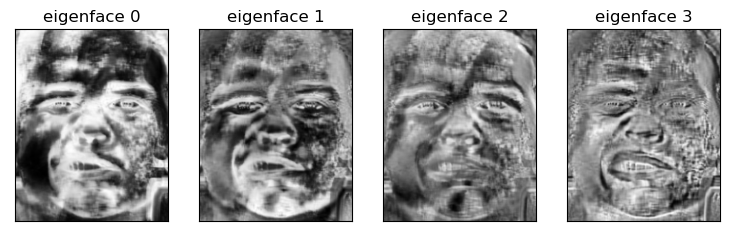

In [54]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[1])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

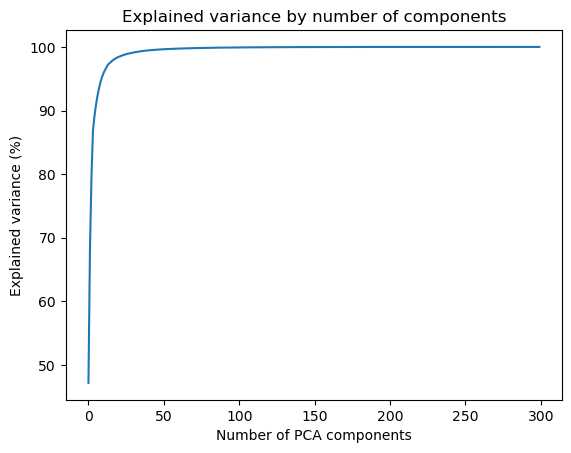

In [55]:
'''check numb of componants for good variance'''
pca = PCA(n_components=300).fit(image) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent)) 
